# Yellow taxi trip record
> - [Link to data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)
> - [Link to data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

## 0. Import libs

In [70]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. Import data

In [71]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
taxi_data = pd.concat([taxi_jan_2019]) # Useful for other months data concatenation

In [72]:
print(taxi_data.shape)
taxi_data.head()

(7667792, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


## 2. Data exploration

In [73]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [74]:
# Selection of useful columns from initial dataframe
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [75]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'RatecodeID'}>],
       [<AxesSubplot: title={'center': 'PULocationID'}>,
        <AxesSubplot: title={'center': 'DOLocationID'}>,
        <AxesSubplot: title={'center': 'payment_type'}>],
       [<AxesSubplot: title={'center': 'total_amount'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

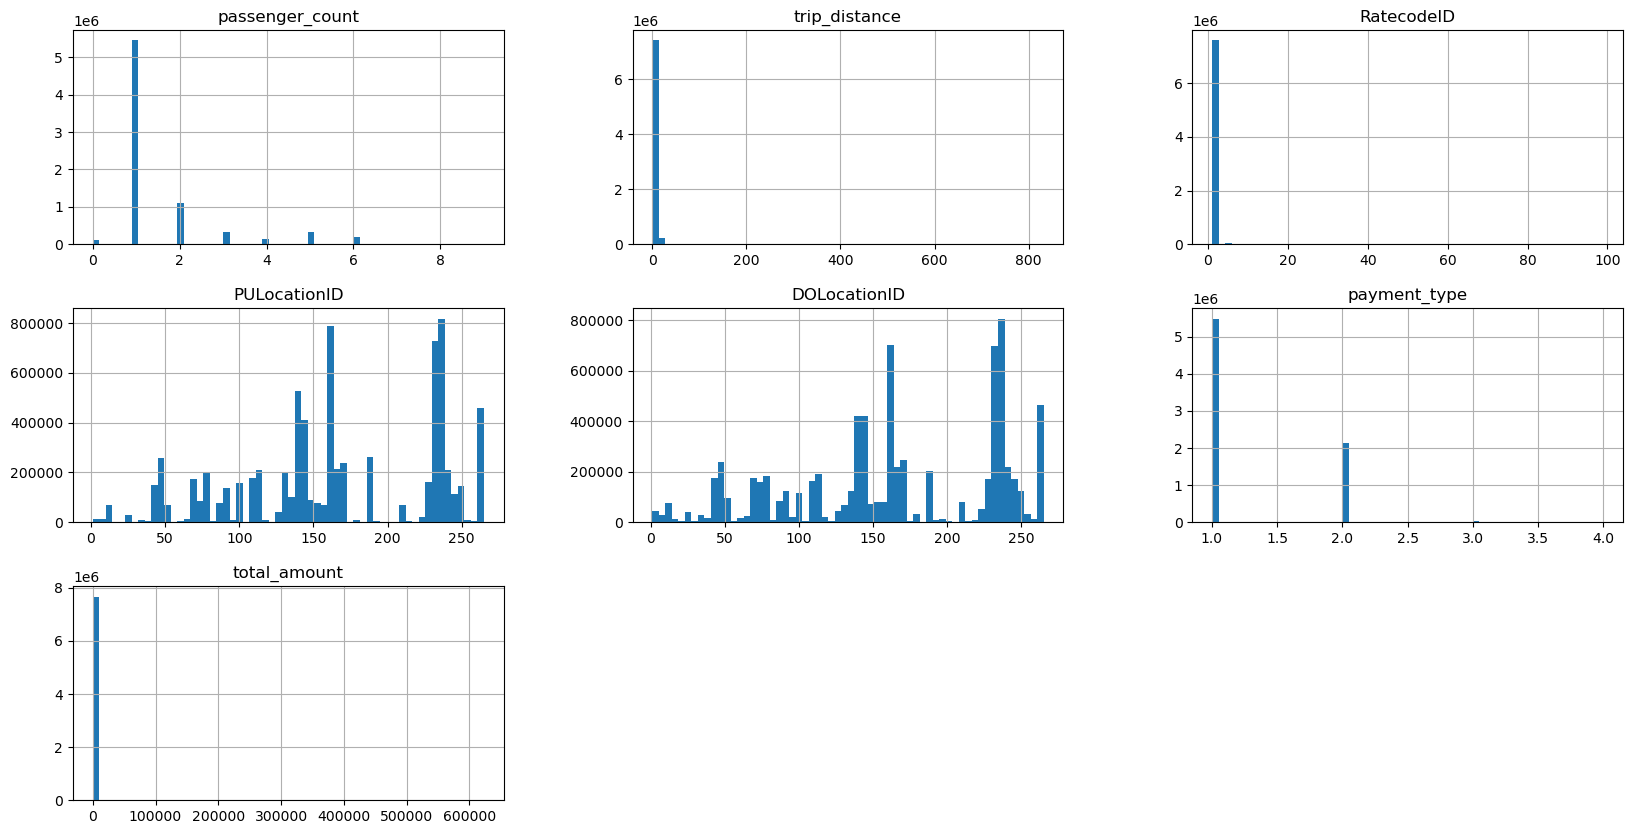

In [76]:
taxi_data.hist(figsize=(20, 10), bins=60)

In [77]:
taxi_data['RatecodeID'].value_counts()

# The final rate code in effect at the end of the trip.
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

<AxesSubplot: xlabel='index', ylabel='total_amount'>

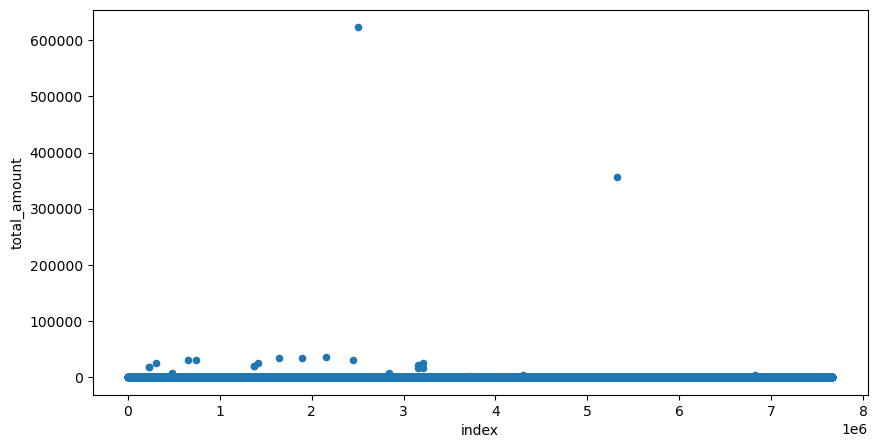

In [78]:
taxi_data.reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(10, 5))

<AxesSubplot: xlabel='index', ylabel='total_amount'>

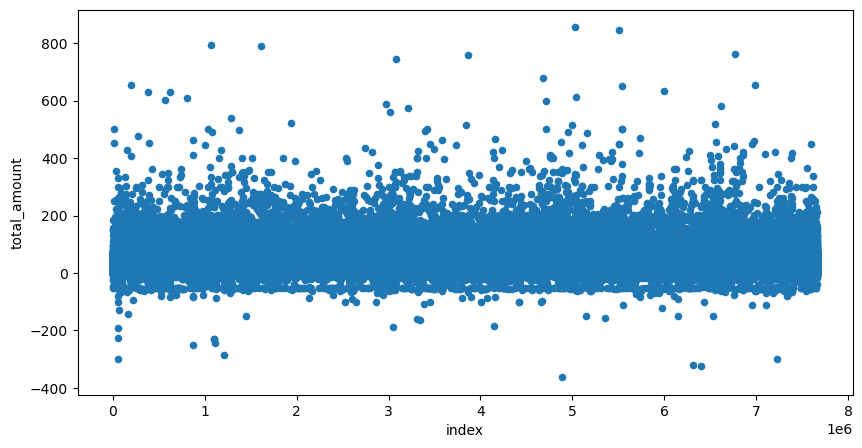

In [79]:
taxi_data[taxi_data['total_amount'] < 1000].reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(10, 5))

Look into:
- negative values
- outliers

(7131, 9)


<AxesSubplot: xlabel='index', ylabel='total_amount'>

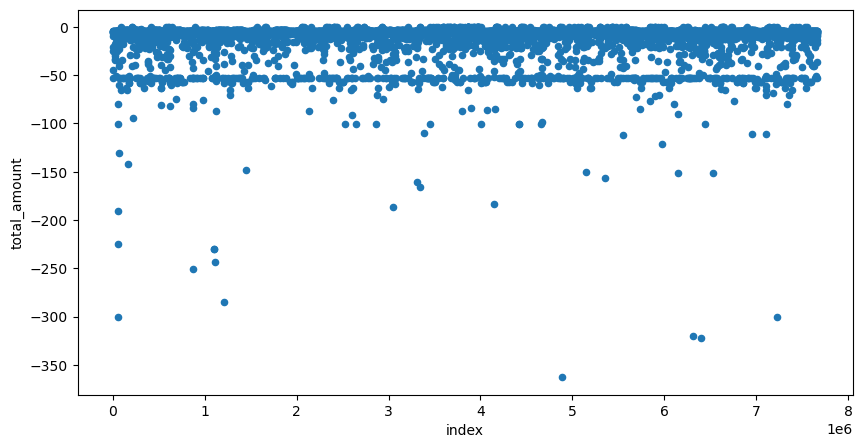

In [80]:
print(taxi_data[taxi_data['total_amount'] < 0].shape)
taxi_data[taxi_data['total_amount'] < 0].reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(10, 5))

In [81]:
taxi_data[taxi_data['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [82]:
taxi_data[taxi_data['total_amount'] < 0]['payment_type'].value_counts()
# A numeric code signifying how the passenger paid for the trip.
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

<AxesSubplot: >

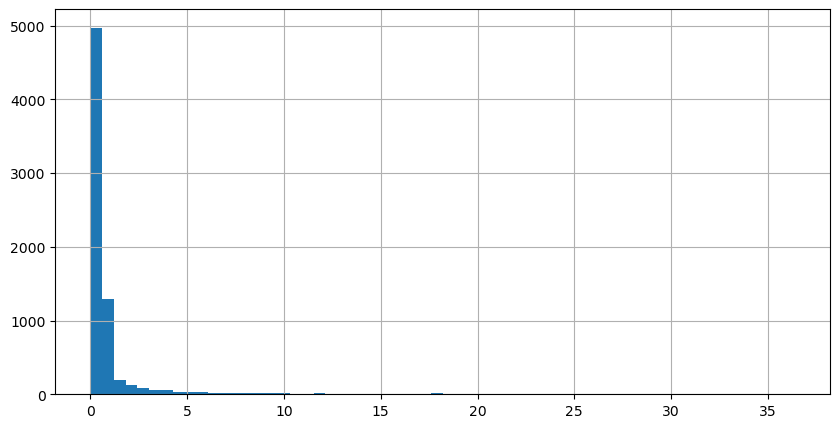

In [83]:
taxi_data[taxi_data['total_amount'] < 0]['trip_distance'].hist(bins=60, figsize=(10, 5))

In [84]:
print(taxi_data[taxi_data['total_amount'] == 0].shape)
taxi_data[taxi_data['total_amount'] == 0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


<AxesSubplot: >

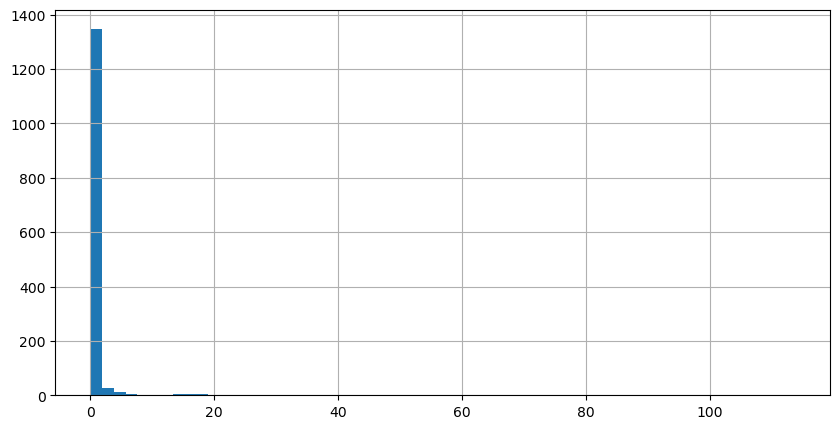

In [85]:
taxi_data[taxi_data['total_amount'] == 0]['trip_distance'].hist(bins=60, figsize=(10, 5))

In [86]:
taxi_data[taxi_data['total_amount'] == 0]['trip_distance'].value_counts()

0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: trip_distance, Length: 110, dtype: int64

<AxesSubplot: xlabel='index', ylabel='total_amount'>

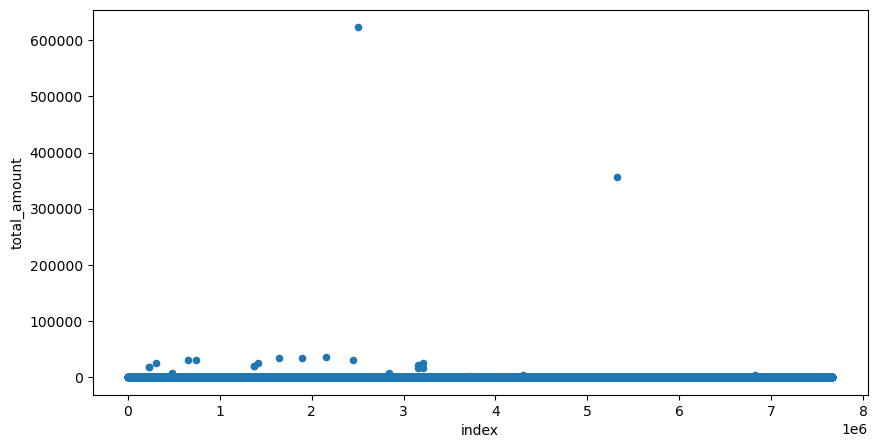

In [ ]:
taxi_data.reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(10, 5))

In [ ]:
taxi_data[taxi_data['total_amount'] > 200].shape

(1166, 9)

In [ ]:
taxi_data['total_amount'].mean().round(2)

15.68

---
**Removing outliers**

total_amounts data > 200 $ will be removed

## 3. Data cleaning

In [ ]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount'] >=0) & (taxi_data['total_amount'] < 200)]

In [ ]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

Look for missing values...

In [ ]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [ ]:
taxi_data_filtered.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55
5,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.0,1,193,193,2,13.31
6,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.0,2,193,193,2,55.55
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,163,229,1,9.05
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,229,7,1,18.50
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,141,234,1,13.00


In [ ]:
taxi_data_filtered.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

## 4. Data prep

In [ ]:
taxi_data_prepared = taxi_data_filtered.copy()

In [ ]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [ ]:
taxi_data_prepared['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'])
taxi_data_prepared['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_dropoff_datetime'])

In [ ]:
taxi_data_prepared['RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [ ]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [ ]:
taxi_data_prepared.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55
5,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.0,1,193,193,2,13.31
6,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.0,2,193,193,2,55.55
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,163,229,1,9.05
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,229,7,1,18.50
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,141,234,1,13.00


In [ ]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [ ]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


In [115]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

---
Identifying categorical and numerical cols:

In [140]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [141]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


---
Data points aggregation

In [142]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_trasactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount'] #adds numerical col
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head(10)

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_trasactions
0,1,2019-01-01,1,1,2,0.000,21.8000,1
1,1,2019-01-01,1,1,5,0.000,87.3000,1
2,1,2019-01-01,1,1,6,0.000,80.3000,1
3,1,2019-01-01,1,1,8,0.000,128.5800,2
4,1,2019-01-01,1,1,10,16.900,43.2450,4
5,1,2019-01-01,1,1,12,4.825,126.2525,4
6,1,2019-01-01,1,1,13,0.000,85.3000,1
7,1,2019-01-01,1,1,15,20.640,79.3100,2
8,1,2019-01-01,1,1,17,0.000,105.5000,1
9,1,2019-01-01,1,1,19,0.055,115.3300,2


<AxesSubplot: >

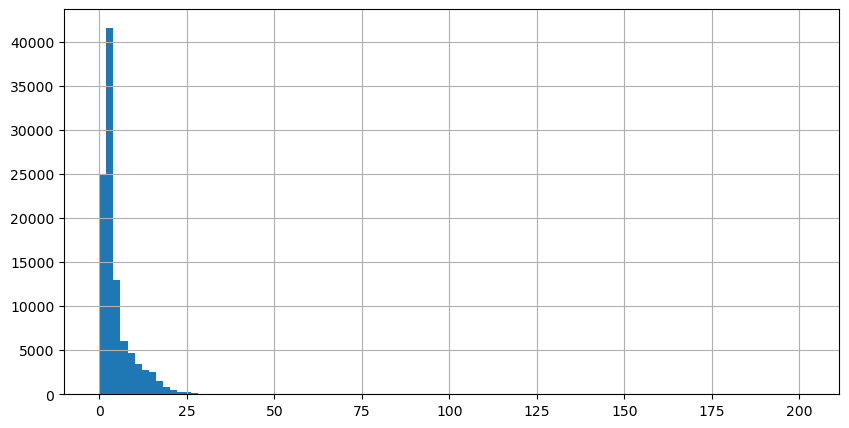

In [143]:
taxi_grouped_by_region['trip_distance'].hist(figsize=(10,5), bins=100)

<AxesSubplot: >

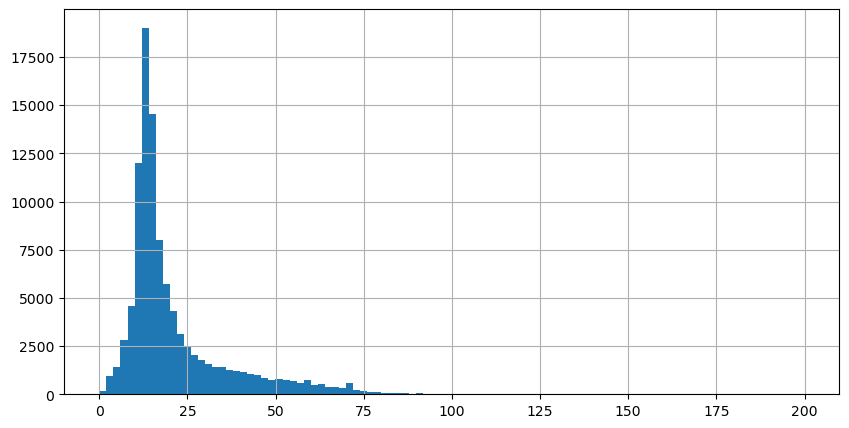

In [144]:
taxi_grouped_by_region['total_amount'].hist(figsize=(10,5), bins=100)